In [3]:
# General Libraries
import os
import math
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Google Colab
from google.colab import drive
import gdown

# Scikit-learn (Data Processing & ML)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

# TensorFlow & Keras (Deep Learning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.models import load_model
import gc
import tensorflow.keras.backend as K

In [4]:
# Define File IDs from Google Drive
CSV_FILE_ID = "1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy"
JSON_FILE_ID = "1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM"
PICKLE_FILE_ID = "1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u"

# Define Local Save Paths
CSV_PATH = "/content/processed_data.csv"
JSON_PATH = "/content/processed_data.json"
PICKLE_PATH = "/content/processed_data.pkl"

# Function to download files
def download_file(file_id, output_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, output_path, quiet=False)

# Download Each File
download_file(CSV_FILE_ID, CSV_PATH)
download_file(JSON_FILE_ID, JSON_PATH)
download_file(PICKLE_FILE_ID, PICKLE_PATH)

print(" All files downloaded successfully!")

# Load the dataset from CSV
import pandas as pd
merged_df = pd.read_csv(CSV_PATH)

# Display first few rows to confirm
print("🔍 Sample Data:")
display(merged_df.head())

# Try loading Pickle (Fastest format)
try:
    print("Downloading Pickle dataset...")
    gdown.download(f"https://drive.google.com/uc?id={PICKLE_FILE_ID}", PICKLE_PATH, quiet=False)
    merged_df = pd.read_pickle(PICKLE_PATH)
    print("Loaded dataset from Pickle!")
except Exception as e:
    print("⚠ Pickle file not found, trying CSV...", e)

    # Fallback to CSV (If Pickle fails)
    try:
        print("Downloading CSV dataset...")
        gdown.download(f"https://drive.google.com/uc?id={CSV_FILE_ID}", CSV_PATH, quiet=False)
        merged_df = pd.read_csv(CSV_PATH)
        print("Loaded dataset from CSV!")
    except Exception as e:
        print("ERROR: Unable to load dataset!", e)
        exit()

# Step 3: Load real-time JSON data (if available)
try:
    print("Downloading JSON dataset...")
    gdown.download(f"https://drive.google.com/uc?id={JSON_FILE_ID}", JSON_PATH, quiet=False)
    with open(JSON_PATH, "r") as json_file:
        json_data = json.load(json_file)
    print("Loaded JSON data for app integration!")
except Exception as e:
    print("⚠ JSON file not found, skipping real-time data.", e)

Downloading...
From (original): https://drive.google.com/uc?id=1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy
From (redirected): https://drive.google.com/uc?id=1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy&confirm=t&uuid=df526ca1-e627-4daf-b8da-99f001e8b375
To: /content/processed_data.csv
100%|██████████| 196M/196M [00:01<00:00, 181MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM
To: /content/processed_data.json
100%|██████████| 24.0/24.0 [00:00<00:00, 118kB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u
To: /content/processed_data.pkl
100%|██████████| 83.6M/83.6M [00:00<00:00, 131MB/s]


 All files downloaded successfully!
🔍 Sample Data:


,date,aru_001_power_mbtuph,aru_001_hwr_temp,aru_001_hws_fr_gpm,aru_001_hws_temp,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,...,rtu_001_sa_temp,rtu_002_sa_temp,rtu_003_sa_temp,rtu_004_sa_temp,mels_S,lig_S,mels_N,hvac_N,hvac_S,Unnamed: 6
0,2020-01-01 00:00:00,0.02026,0.927623,0.916622,0.957464,0.045933,0.000000,0.503252,0.489130,0.604774,...,0.681570,0.685223,0.748628,0.785548,0.150193,0.013905,0.804597,0.720685,0.392732,0.399310
1,2020-01-01 00:05:00,0.02026,0.921541,0.915149,0.914139,0.046415,0.432004,0.519356,0.491870,0.628968,...,0.711014,0.682186,0.754116,0.789044,0.150421,0.013517,0.608455,0.563652,0.374016,0.399310
2,2020-01-01 00:10:00,0.02026,0.883832,0.915149,0.913056,0.046897,0.864009,0.535460,0.494609,0.653161,...,0.704471,0.695344,0.750823,0.787879,0.150649,0.013130,0.412313,0.406620,0.355301,0.399310
3,2020-01-01 00:15:00,0.02026,0.918094,0.915001,0.946140,0.046897,0.863782,0.538712,0.489174,0.624968,...,0.688113,0.691296,0.747530,0.784382,0.150876,0.012743,0.216171,0.249587,0.336585,0.399310
4,2020-01-01 00:20:00,0.02026,0.938875,0.915001,0.935605,0.046897,0.863555,0.541963,0.483739,0.596774,...,0.690294,0.679150,0.746432,0.785548,0.154066,0.013130,0.259503,0.250316,0.341070,0.405665


Downloading...
From: https://drive.google.com/uc?id=1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u
To: /content/processed_data.pkl
100%|██████████| 83.6M/83.6M [00:00<00:00, 189MB/s]


Loaded dataset from Pickle!


Downloading...
From: https://drive.google.com/uc?id=1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM
To: /content/processed_data.json
100%|██████████| 24.0/24.0 [00:00<00:00, 36.6kB/s]

⚠ JSON file not found, skipping real-time data. name 'json' is not defined


In [6]:
# Train model for predicting hourly energy usage using a TPU

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # detect
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("All TPU devices: ", tf.config.list_logical_devices('TPU'))
except ValueError:
    # Fallback to CPU or GPU if TPU not found
    strategy = tf.distribute.get_strategy()


time_steps = 8
with strategy.scope():
    model = Sequential([
        LSTM(32, activation="relu", return_sequences=True, input_shape=(time_steps, 3)),
        LSTM(16, activation="relu"),
        Dense(3)  # Predict total_hvac, total_lighting, total_mels
    ])
    model.compile(optimizer="adam", loss="mae")

# Load and Preprocess Data
merged_df["date"] = pd.to_datetime(merged_df["date"])

# Select First 3 Months Before COVID
df_3m = merged_df[(merged_df["date"] >= "2020-01-01") & (merged_df["date"] < "2020-04-01")].copy()

# Reduce Dataset Size to Prevent RAM Overflow
#df_3m = df_3m.sample(n=50000, random_state=42)  # Use only 50K rows

# Feature Engineering
df_3m["hour"] = df_3m["date"].dt.hour  # Hour of the day
df_3m["day_of_week"] = df_3m["date"].dt.dayofweek  # Monday=0, Sunday=6

# Define LSTM Time Steps
# Use past 8 hours to predict the next hour

# get the data from the temperature zones
data = df_3m[["zone_039_temp", "zone_043_temp", "zone_067_temp"]].values

X = np.array([data[i:i+time_steps] for i in range(0, len(data) - time_steps)])
y = np.array([data[i+time_steps] for i in range(0, len(data) - time_steps)])

print(f"Optimized Training Data Shape: X={X.shape}, y={y.shape}")

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Data to Efficient TensorFlow Dataset
BATCH_SIZE = 32  # TPU prefers large batches
BUFFER_SIZE = 10000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

def prepare_tpu_dataset(X, y, batch_size=32, buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_data = prepare_tpu_dataset(X_train, y_train)
test_data = prepare_tpu_dataset(X_test, y_test)

# Train Model Efficiently
model.fit(train_data, epochs=5, validation_data=test_data, verbose=1)
# Save model
model.save("hourly_temperature_prediction.keras")  # or .pb, or a folder with tf.saved_model
print("Model Trained and saved!")

All TPU devices:  [LogicalDevice(name='/device:TPU:0', device_type='TPU'), LogicalDevice(name='/device:TPU:1', device_type='TPU'), LogicalDevice(name='/device:TPU:2', device_type='TPU'), LogicalDevice(name='/device:TPU:3', device_type='TPU'), LogicalDevice(name='/device:TPU:4', device_type='TPU'), LogicalDevice(name='/device:TPU:5', device_type='TPU'), LogicalDevice(name='/device:TPU:6', device_type='TPU'), LogicalDevice(name='/device:TPU:7', device_type='TPU')]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Optimized Training Data Shape: X=(27654, 8, 3), y=(27654, 3)
Epoch 1/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.1069 - val_loss: 0.0105
Epoch 2/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 3/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 4/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 5/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - loss: 0.0087 - val_loss: 0.0084
Model Trained and saved!


173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model Evaluated!
MAE - Temp Zone 039: 0.01
MAE - Temp Zone 043: 0.01
MAE - Temp Zone 067: 0.01


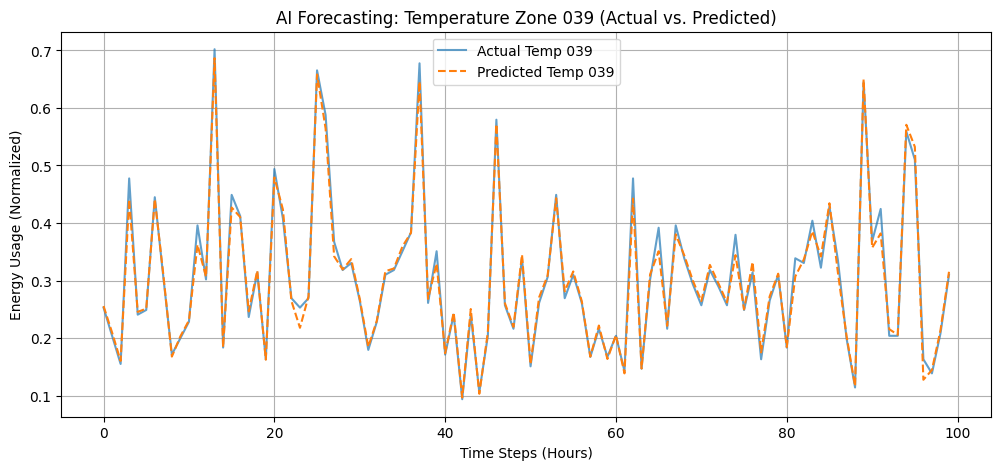

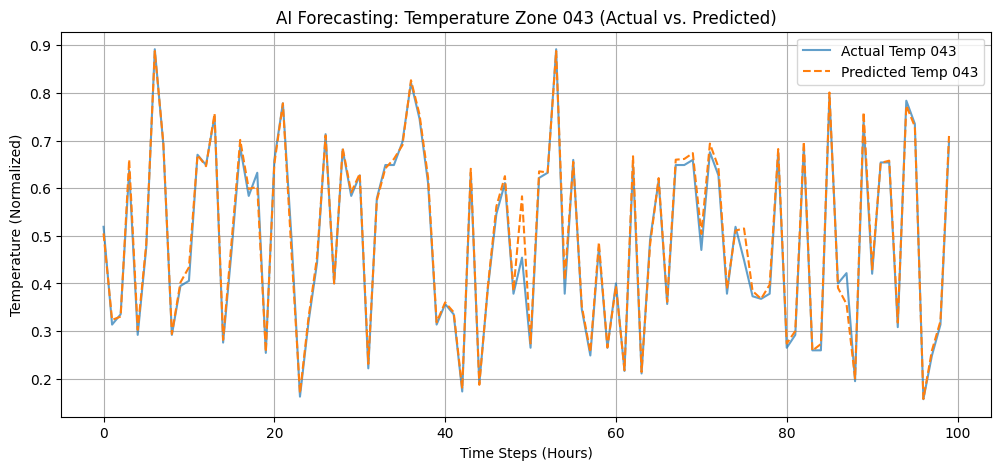

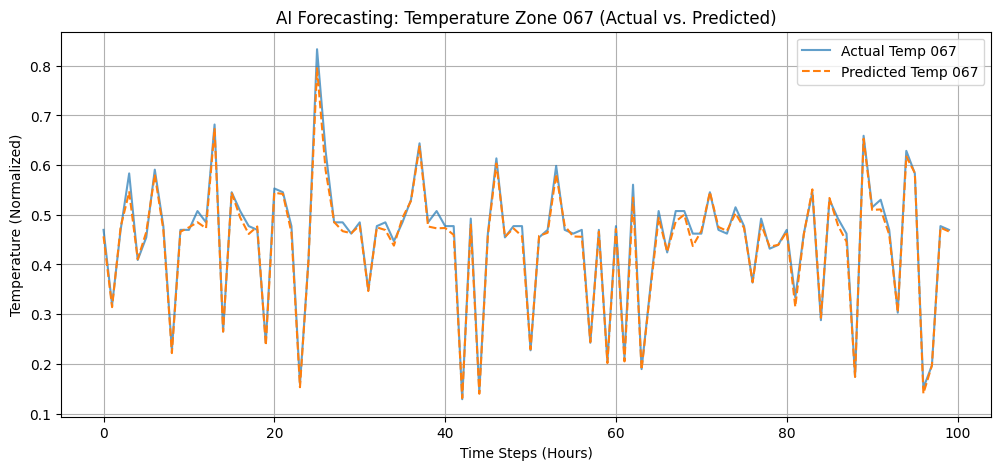

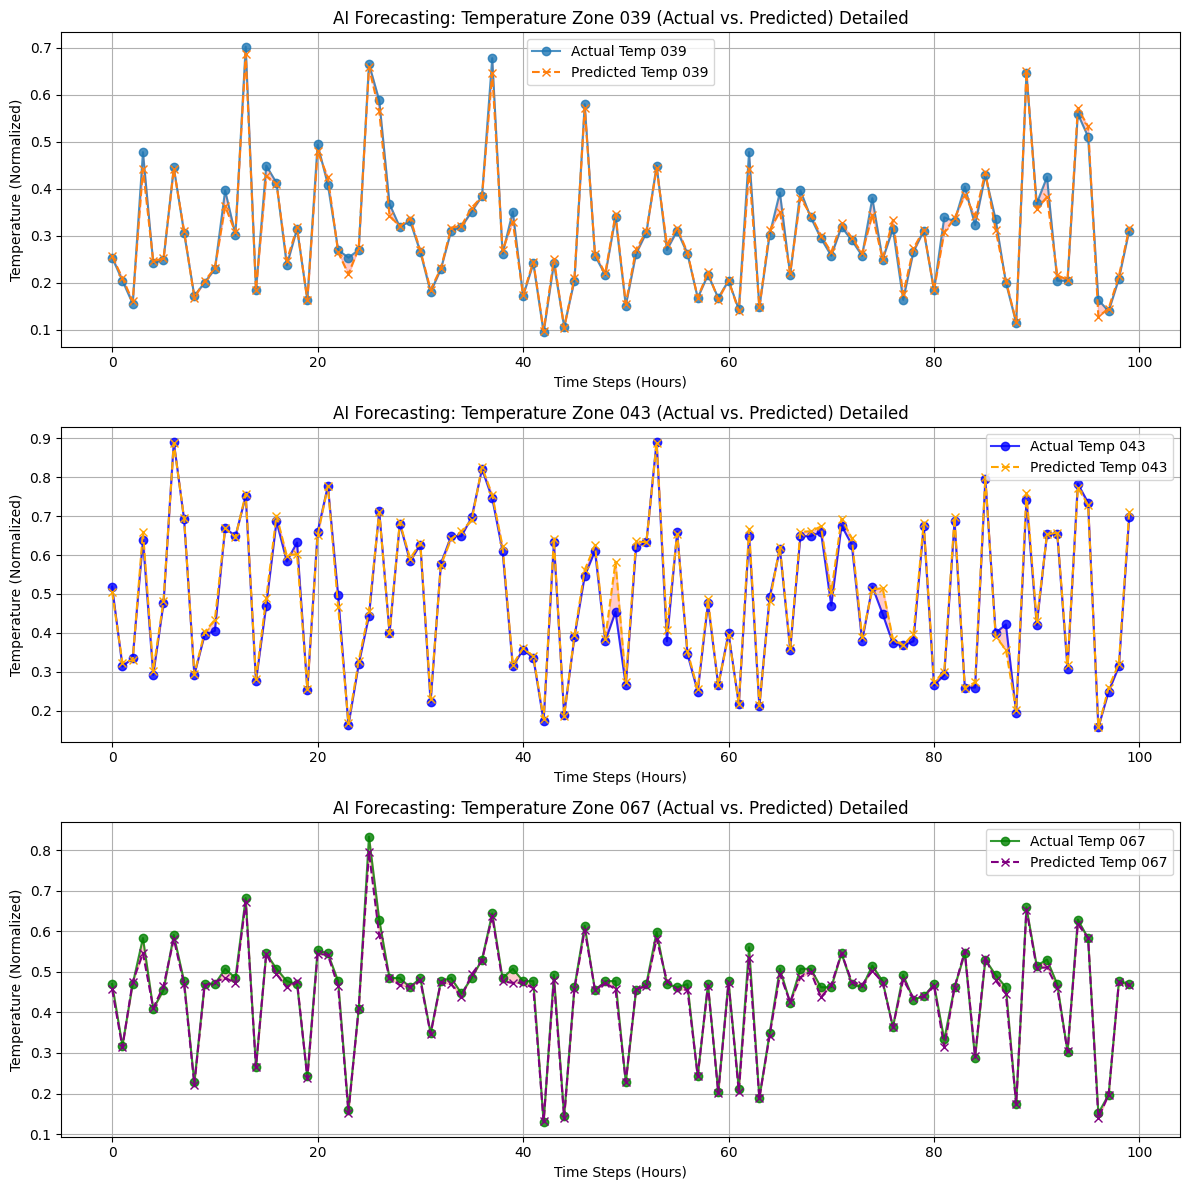

<Figure size 1200x500 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


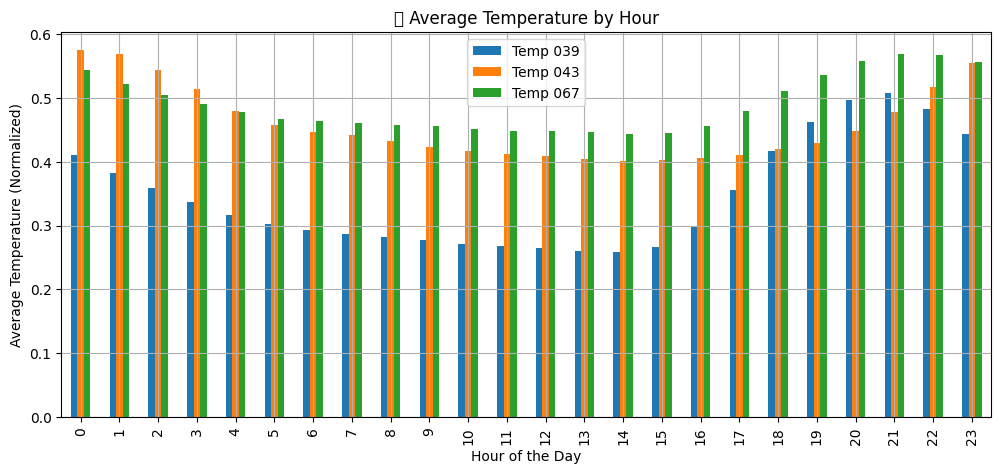

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


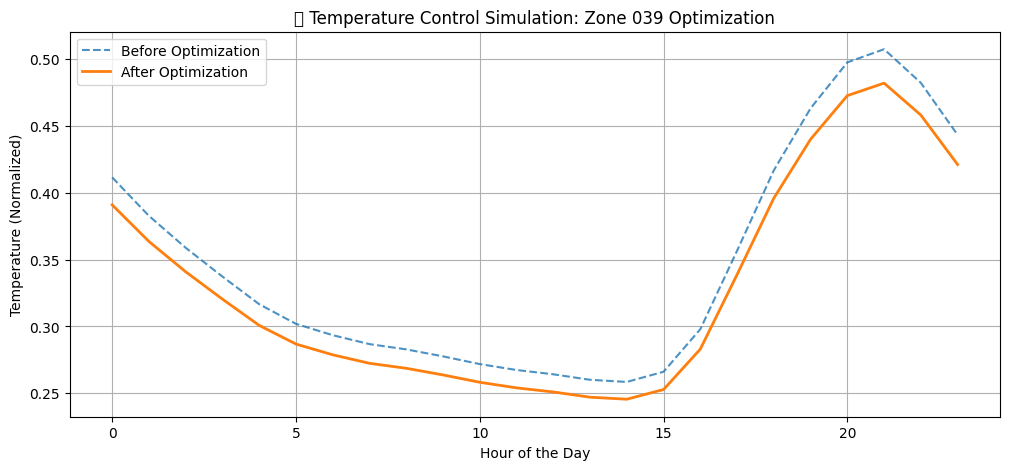

In [8]:
# Predict & Evaluate Model
model = load_model("/content/hourly_temperature_prediction.keras")

y_pred = model.predict(X_test, batch_size=32)

# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae_temp_039 = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_temp_043 = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_temp_067 = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f"Model Evaluated!")
print(f"MAE - Temp Zone 039: {mae_temp_039:.2f}")
print(f"MAE - Temp Zone 043: {mae_temp_043:.2f}")
print(f"MAE - Temp Zone 067: {mae_temp_067:.2f}")

# Plot evaluation results
# HVAC Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test[:100, 0], label="Actual Temp 039", alpha=0.7)
plt.plot(y_pred[:100, 0], label="Predicted Temp 039", linestyle="dashed")
plt.title("AI Forecasting: Temperature Zone 039 (Actual vs. Predicted)")
plt.legend()
plt.xlabel("Time Steps (Hours)")
plt.ylabel("Energy Usage (Normalized)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test[:100, 1], label="Actual Temp 043", alpha=0.7)
plt.plot(y_pred[:100, 1], label="Predicted Temp 043", linestyle="dashed")
plt.legend()
plt.title("AI Forecasting: Temperature Zone 043 (Actual vs. Predicted)")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("Temperature (Normalized)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test[:100, 2], label="Actual Temp 067", alpha=0.7)
plt.plot(y_pred[:100, 2], label="Predicted Temp 067", linestyle="dashed")
plt.legend()
plt.title("AI Forecasting: Temperature Zone 067 (Actual vs. Predicted)")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("Temperature (Normalized)")
plt.grid(True)
plt.show()

# Compute absolute errors
error_hvac = np.abs(y_test[:100, 0] - y_pred[:100, 0])
error_lighting = np.abs(y_test[:100, 1] - y_pred[:100, 1])
error_mels = np.abs(y_test[:100, 2] - y_pred[:100, 2])

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Temperature Zone 039 Detailed Plot
axes[0].plot(y_test[:100, 0], label="Actual Temp 039", alpha=0.8, marker="o")
axes[0].plot(y_pred[:100, 0], label="Predicted Temp 039", linestyle="dashed", marker="x")
axes[0].fill_between(range(100), y_test[:100, 0], y_pred[:100, 0], color="red", alpha=0.2)  # Shade error
axes[0].legend()
axes[0].set_title("AI Forecasting: Temperature Zone 039 (Actual vs. Predicted) Detailed")
axes[0].set_ylabel("Temperature (Normalized)")
axes[0].set_xlabel("Time Steps (Hours)")
axes[0].grid(True)

# Temperature Zone 043 Detailed Plot
axes[1].plot(y_test[:100, 1], label="Actual Temp 043", alpha=0.8, marker="o", color="blue")
axes[1].plot(y_pred[:100, 1], label="Predicted Temp 043", linestyle="dashed", marker="x", color="orange")
axes[1].fill_between(range(100), y_test[:100, 1], y_pred[:100, 1], color="red", alpha=0.2)
axes[1].legend()
axes[1].set_title("AI Forecasting: Temperature Zone 043 (Actual vs. Predicted) Detailed")
axes[1].set_ylabel("Temperature (Normalized)")
axes[1].set_xlabel("Time Steps (Hours)")
axes[1].grid(True)

# Temperature Zone 067 Detailed Plot
axes[2].plot(y_test[:100, 2], label="Actual Temp 067", alpha=0.8, marker="o", color="green")
axes[2].plot(y_pred[:100, 2], label="Predicted Temp 067", linestyle="dashed", marker="x", color="purple")
axes[2].fill_between(range(100), y_test[:100, 2], y_pred[:100, 2], color="red", alpha=0.2)
axes[2].legend()
axes[2].set_title("AI Forecasting: Temperature Zone 067 (Actual vs. Predicted) Detailed")
axes[2].set_ylabel("Temperature (Normalized)")
axes[2].set_xlabel("Time Steps (Hours)")
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Show some possible temperature insights

plt.figure(figsize=(12, 5))
merged_df["hour"] = merged_df["date"].dt.hour
hourly_avg = merged_df.groupby("hour")[["zone_039_temp", "zone_043_temp", "zone_067_temp"]].mean()
hourly_avg.plot(kind="bar", figsize=(12, 5))
plt.title("🔍 Average Temperature by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Temperature (Normalized)")
plt.legend(["Temp 039", "Temp 043", "Temp 067"])
plt.grid(True)
plt.show()

# Simulated temperature optimization: Reduce peak by 5%
optimized_temperature = hourly_avg * 0.95  # Assume 5% improvement in temperature control

plt.figure(figsize=(12, 5))
plt.plot(hourly_avg["zone_039_temp"], label="Before Optimization", linestyle="dashed", alpha=0.8)
plt.plot(optimized_temperature["zone_039_temp"], label="After Optimization", linewidth=2)
plt.title("🏢 Temperature Control Simulation: Zone 039 Optimization")
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (Normalized)")
plt.legend()
plt.grid(True)
plt.show()